## What is Univariate(ANOVA) Test?

<img src='intro.JPG'>
<h3>ANOVA One way classification</h3>
<img src='oneway.JPG'>
<h3>Example</h3>
<img src='examp1.JPG'>
<img src='examp2.JPG'>
<img src='examp3.JPG'>
<img src='compare.JPG'>

Images Source credit :https://www.slideshare.net/sravaniganti1/anova-ppt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif,f_regression
from sklearn.feature_selection import SelectKBest,SelectPercentile

In [3]:
data = pd.read_csv('santander-train.csv',nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
X = data.drop('TARGET',axis=1)
y = data.TARGET

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0,stratify=y)

### constant feature removal

In [6]:
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)

VarianceThreshold(threshold=0)

In [7]:
X_uncontrain = sel.transform(X_train)
X_uncontest = sel.transform(X_test)

In [8]:
X_uncontrain.shape,X_train.shape

((16000, 291), (16000, 370))

### Quasi Constant removal

In [9]:
SEL = VarianceThreshold(threshold=0.01)
SEL.fit(X_uncontrain)
X_newtest = SEL.transform(X_uncontest)
X_newtrain = SEL.transform(X_uncontrain)

In [10]:
X_newtrain.shape,X_train.shape

((16000, 245), (16000, 370))

### Duplicate Feature Removal

In [11]:
X_newtrain = pd.DataFrame(X_newtrain)
X_newtest = pd.DataFrame(X_newtest)

In [12]:
X_train_T = X_newtrain.T
X_test_T = X_newtest.T

In [13]:
X_train_T.duplicated().sum()

18

In [14]:
duplicated_feature = X_train_T.duplicated()
feature_to_keep = [not temp for temp in duplicated_feature]
X_train_unique = X_train_T[feature_to_keep].T
X_test_unique = X_test_T[feature_to_keep].T

In [15]:
X_train_unique.shape,X_train.shape,X_test_unique.shape

((16000, 227), (16000, 370), (4000, 227))

### Now do F statistics test

In [16]:
sel= f_classif(X_train_unique,y_train)
sel

(array([3.42911520e-01, 1.22929093e+00, 1.61291330e+02, 4.01025132e-01,
        8.37661151e-01, 2.39279390e-03, 4.41633351e-02, 1.36337510e-01,
        1.84647123e+00, 2.03640367e+00, 7.98057954e-03, 1.14063993e+00,
        6.32266614e-03, 1.55626237e+01, 1.53553790e+01, 1.28615978e+01,
        1.61834746e+01, 1.59638013e+01, 1.21977511e+01, 9.03776687e-02,
        1.00443179e+00, 1.53946148e+01, 2.50428951e+02, 2.98696944e+01,
        1.06266841e+01, 2.63630437e+01, 1.66417611e+01, 3.13699473e+01,
        2.47256550e+01, 2.60021376e+01, 3.26742018e+01, 9.94259060e+00,
        1.48208220e+01, 1.50040146e+01, 1.34739830e+01, 7.03118653e+00,
        1.36234772e+01, 7.95962134e+00, 3.15161070e+02, 1.79631284e+00,
        1.66910747e+00, 1.21138302e+01, 1.10928892e+01, 1.00443179e+00,
        2.31851572e+00, 8.93973153e+01, 7.53868668e+00, 2.38490562e+02,
        2.98696944e+01, 1.06266841e+01, 2.61694409e+01, 1.66053267e+01,
        2.93013259e+01, 2.44433356e+01, 2.60021376e+01, 5.596238

In [17]:
p_values = pd.Series(sel[1])
p_values.index = X_train_unique.columns
p_values.sort_values(ascending=True,inplace=True)

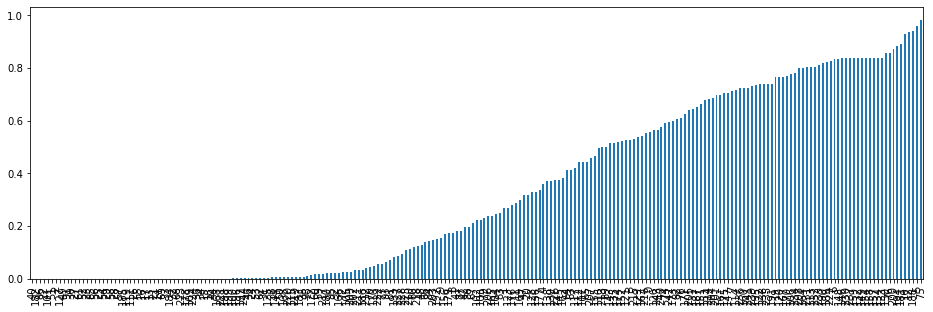

In [18]:
p_values.plot.bar(figsize=(16,5))

we take only p_values which have less than 0.05 value

In [19]:
p_values = p_values[p_values<0.05]
p_values

40     7.665738e-70
182    1.494938e-68
86     4.187175e-61
22     5.565785e-56
101    3.557912e-55
           ...     
211    3.232153e-02
186    3.342479e-02
212    4.162651e-02
70     4.286237e-02
110    4.639047e-02
Length: 88, dtype: float64

In [20]:
p_values.index

Int64Index([ 40, 182,  86,  22, 101,  51,   2, 127,  49,  91,  30,  27,  61,
             52,  23,  85,  56,  25,  54,  29,  58,  28,  57, 185, 119, 111,
             26,  55,  16,  17,  13,  21,  14,  69,  33, 184,  32,  68, 223,
            178, 109, 224,  36,  34,  15,  18,  44, 168, 221, 198, 199, 100,
            196, 197, 244,  46,  24,  53,  62,  31, 125,  38, 144,  50, 108,
            220, 115, 219, 183,  35,  98, 172,  60,  59, 217, 180,  95,  92,
            166,  72, 105, 209, 202, 211, 186, 212,  70, 110],
           dtype='int64')

In [21]:
# training and testing data sets 
X_train_p = X_train_unique[p_values.index]
X_test_p = X_test_unique[p_values.index]

#### Performace Check 

In [22]:
def random_forest(X_train,X_test,y_train,y_test):
    clf = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('accuracy:',accuracy_score(y_test,y_pred))

In [23]:
%%time
random_forest(X_train,X_test,y_train,y_test)

accuracy: 0.9585
Wall time: 1.46 s


In [24]:
X_train_p.shape,X_test_p.shape

((16000, 88), (4000, 88))

In [25]:
%%time
random_forest(X_train_p,X_test_p,y_train,y_test)

accuracy: 0.953
Wall time: 677 ms
